<a href="https://colab.research.google.com/github/uhyozzy/multi_semiproject/blob/main/step1_features%EC%99%80_%ED%95%98%EC%88%98%EA%B4%80%EB%A1%9C%EB%B9%84%EC%9C%A8%EA%B3%BC%EC%9D%98_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84(heatmap).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Base**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import unicodedata

## **파일 준비**

In [4]:
import chardet
with open("/content/230804.csv", mode='rb') as f:
  d = f.readline()
print(chardet.detect(d))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


**파일읽기**

In [6]:
df = pd.read_csv("/content/230804.csv",encoding='utf-8')
df

# 주피터 노트북에 파일 없으면 오류뜸, 노트북 자체에 파일 옮기고 pd.read 실시

,자치구(구),날짜,1hr 최대 강수량(mm),일평균 강수량(mm),경사도(˚),해발고도(m),불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),하수관로 비율(%)
0,종로,20180601,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.009084
1,종로,20180602,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008864
2,종로,20180603,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008182
3,종로,20180604,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008745
4,종로,20180605,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,강동,20220827,17.5,17.5,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.069436
11496,강동,20220828,0.0,0.0,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.062210
11497,강동,20220829,0.5,1.5,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.066022
11498,강동,20220830,5.0,43.5,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.090625


**각 컬럼별 결측치 확인**

In [7]:
df.isnull()
df.isnull().sum()

자치구(구)              0
날짜                  0
1hr 최대 강수량(mm)      0
일평균 강수량(mm)         0
경사도(˚)              0
해발고도(m)             0
불투수면(%)             0
녹지 면적율(%)           0
하천 면적율(%)           0
복개하천 개수(개)          0
맨홀 개수(개)            0
빗물받이 개수(개)          0
빗물 펌프 개수(개)         0
하수관로 비율(%)        213
dtype: int64

**데이터프레임의 누락데이터 제거**

In [8]:
#누락데이터가 하나라도 포함된 행은 삭제
df.dropna(how='any', axis=0, inplace=True)
# df의 결측치 제거확인
df.isnull().sum()

자치구(구)            0
날짜                0
1hr 최대 강수량(mm)    0
일평균 강수량(mm)       0
경사도(˚)            0
해발고도(m)           0
불투수면(%)           0
녹지 면적율(%)         0
하천 면적율(%)         0
복개하천 개수(개)        0
맨홀 개수(개)          0
빗물받이 개수(개)        0
빗물 펌프 개수(개)       0
하수관로 비율(%)        0
dtype: int64

# **데이터 프레임 나누기**
- 자치구와 날짜
  - pd_df = place, date
- features data
  - pf_df = precipitation features 강수특징
  - tf_df = topographic features 지형특징
  - ef_df = environment feature 자연환경특징
- label data
  - ld_df = label data : 하수관로 비율(%)

In [9]:
pd_df = df[['자치구(구)','날짜']]
pd_df

,자치구(구),날짜
0,종로,20180601
1,종로,20180602
2,종로,20180603
3,종로,20180604
4,종로,20180605
...,...,...
11495,강동,20220827
11496,강동,20220828
11497,강동,20220829
11498,강동,20220830


In [10]:
pf_df = df[['1hr 최대 강수량(mm)','일평균 강수량(mm)']]
pf_df

,1hr 최대 강수량(mm),일평균 강수량(mm)
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
11495,17.5,17.5
11496,0.0,0.0
11497,0.5,1.5
11498,5.0,43.5


In [11]:
tf_df = df[['경사도(˚)','해발고도(m)']]
tf_df

,경사도(˚),해발고도(m)
0,12.033665,146.699945
1,12.033665,146.699945
2,12.033665,146.699945
3,12.033665,146.699945
4,12.033665,146.699945
...,...,...
11495,3.944715,25.698091
11496,3.944715,25.698091
11497,3.944715,25.698091
11498,3.944715,25.698091


In [12]:
ef_df = df[['불투수면(%)','녹지 면적율(%)','하천 면적율(%)','복개하천 개수(개)',
            '맨홀 개수(개)','빗물받이 개수(개)','빗물 펌프 개수(개)']]
ef_df

,불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개)
0,0.420170,0.0094,0.011652,1,9854,16173,0
1,0.420170,0.0094,0.011652,1,9854,16173,0
2,0.420170,0.0094,0.011652,1,9854,16173,0
3,0.420170,0.0094,0.011652,1,9854,16173,0
4,0.420170,0.0094,0.011652,1,9854,16173,0
...,...,...,...,...,...,...,...
11495,0.471826,0.0359,0.134420,0,10269,22313,35
11496,0.471826,0.0359,0.134420,0,10269,22313,35
11497,0.471826,0.0359,0.134420,0,10269,22313,35
11498,0.471826,0.0359,0.134420,0,10269,22313,35


In [13]:
ld_df = df[['하수관로 비율(%)']]
ld_df

,하수관로 비율(%)
0,0.009084
1,0.008864
2,0.008182
3,0.008745
4,0.008753
...,...
11495,0.069436
11496,0.062210
11497,0.066022
11498,0.090625


**상관분석용 데이터 만들기**
- cd :  correlation dataframe
- cd1 : 강수특징(pf_df)과 하수관로비율 레이블(ld_df) 합친 df
- cd2 : 지형특징(tf_df)과 하수관로비율 레이블(ld_df) 합친 df
- cd3 : 자연환경특징(ef_df)과 하수관로비율 레이블(ld_df) 합친 df
- cd4 : pf_df, tf_df, ef_df와 하수곤로비율 레이블의 상관관계

In [14]:
cd1 = pf_df.join(ld_df)
cd1

,1hr 최대 강수량(mm),일평균 강수량(mm),하수관로 비율(%)
0,0.0,0.0,0.009084
1,0.0,0.0,0.008864
2,0.0,0.0,0.008182
3,0.0,0.0,0.008745
4,0.0,0.0,0.008753
...,...,...,...
11495,17.5,17.5,0.069436
11496,0.0,0.0,0.062210
11497,0.5,1.5,0.066022
11498,5.0,43.5,0.090625


In [15]:
cd2 = tf_df.join(ld_df)
cd2

,경사도(˚),해발고도(m),하수관로 비율(%)
0,12.033665,146.699945,0.009084
1,12.033665,146.699945,0.008864
2,12.033665,146.699945,0.008182
3,12.033665,146.699945,0.008745
4,12.033665,146.699945,0.008753
...,...,...,...
11495,3.944715,25.698091,0.069436
11496,3.944715,25.698091,0.062210
11497,3.944715,25.698091,0.066022
11498,3.944715,25.698091,0.090625


In [16]:
cd3 = ef_df.join(ld_df)
cd3

,불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),하수관로 비율(%)
0,0.420170,0.0094,0.011652,1,9854,16173,0,0.009084
1,0.420170,0.0094,0.011652,1,9854,16173,0,0.008864
2,0.420170,0.0094,0.011652,1,9854,16173,0,0.008182
3,0.420170,0.0094,0.011652,1,9854,16173,0,0.008745
4,0.420170,0.0094,0.011652,1,9854,16173,0,0.008753
...,...,...,...,...,...,...,...,...
11495,0.471826,0.0359,0.134420,0,10269,22313,35,0.069436
11496,0.471826,0.0359,0.134420,0,10269,22313,35,0.062210
11497,0.471826,0.0359,0.134420,0,10269,22313,35,0.066022
11498,0.471826,0.0359,0.134420,0,10269,22313,35,0.090625


In [31]:
cd4 = df.iloc[:, 2:]
cd4

,1hr 최대 강수량(mm),일평균 강수량(mm),경사도(˚),해발고도(m),불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),하수관로 비율(%)
0,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.009084
1,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008864
2,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008182
3,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008745
4,0.0,0.0,12.033665,146.699945,0.420170,0.0094,0.011652,1,9854,16173,0,0.008753
...,...,...,...,...,...,...,...,...,...,...,...,...
11495,17.5,17.5,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.069436
11496,0.0,0.0,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.062210
11497,0.5,1.5,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.066022
11498,5.0,43.5,3.944715,25.698091,0.471826,0.0359,0.134420,0,10269,22313,35,0.090625


## **상관관계 파악하기**

In [17]:
cd1.corr()

,1hr 최대 강수량(mm),일평균 강수량(mm),하수관로 비율(%)
1hr 최대 강수량(mm),1.000000,0.865369,0.192918
일평균 강수량(mm),0.865369,1.000000,0.216069
하수관로 비율(%),0.192918,0.216069,1.000000


In [18]:
cd2.corr()

,경사도(˚),해발고도(m),하수관로 비율(%)
경사도(˚),1.000000,0.909621,-0.194702
해발고도(m),0.909621,1.000000,-0.145598
하수관로 비율(%),-0.194702,-0.145598,1.000000


In [19]:
cd3.corr()

,불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),하수관로 비율(%)
불투수면(%),1.000000,0.259613,0.147487,-0.223985,-0.214044,-0.140007,0.172530,0.074498
녹지 면적율(%),0.259613,1.000000,0.417054,-0.340550,0.310680,0.302248,0.330722,0.092961
하천 면적율(%),0.147487,0.417054,1.000000,-0.307321,0.167382,0.117901,0.301695,0.184433
복개하천 개수(개),-0.223985,-0.340550,-0.307321,1.000000,0.121882,0.023857,-0.149484,-0.029659
맨홀 개수(개),-0.214044,0.310680,0.167382,0.121882,1.000000,0.637541,0.157582,0.097040
빗물받이 개수(개),-0.140007,0.302248,0.117901,0.023857,0.637541,1.000000,0.237757,0.096123
빗물 펌프 개수(개),0.172530,0.330722,0.301695,-0.149484,0.157582,0.237757,1.000000,0.149017
하수관로 비율(%),0.074498,0.092961,0.184433,-0.029659,0.097040,0.096123,0.149017,1.000000


## **heatmap 시각화**

In [20]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [21]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

In [22]:
plt.figure(figsize=(12, 9))
plt.show()

<Figure size 1200x900 with 0 Axes>

In [23]:
import warnings
warnings.filterwarnings("ignore")

**강수특징과 하수관로비율과의 관계**

Text(0.5, 1.0, '강수특징과 하수관로비율과의 관계')

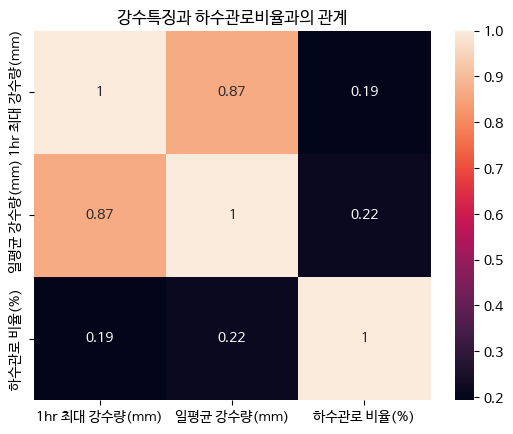

In [37]:
sns.heatmap(cd1.corr(),annot=True)
plt.title('강수특징과 하수관로비율과의 관계')

**지형특징과 하수관로비율과의 관계**

Text(0.5, 1.0, '지형특징과 하수관로비율과의 관계')

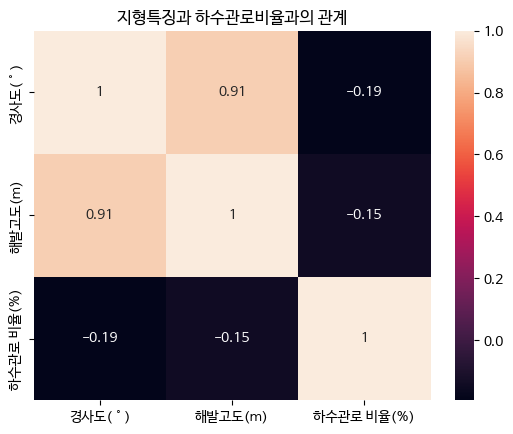

In [38]:
sns.heatmap(cd2.corr(), annot=True)
plt.title('지형특징과 하수관로비율과의 관계')

**자연환경특징과 하수관로비율과의 관계**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, '1hr 최대 강수량(mm)'),
  Text(1.5, 0, '일평균 강수량(mm)'),
  Text(2.5, 0, '경사도(˚)'),
  Text(3.5, 0, '해발고도(m)'),
  Text(4.5, 0, '불투수면(%)'),
  Text(5.5, 0, '녹지 면적율(%)'),
  Text(6.5, 0, '하천 면적율(%)'),
  Text(7.5, 0, '복개하천 개수(개)'),
  Text(8.5, 0, '맨홀 개수(개)'),
  Text(9.5, 0, '빗물받이 개수(개)'),
  Text(10.5, 0, '빗물 펌프 개수(개)'),
  Text(11.5, 0, '하수관로 비율(%)')])

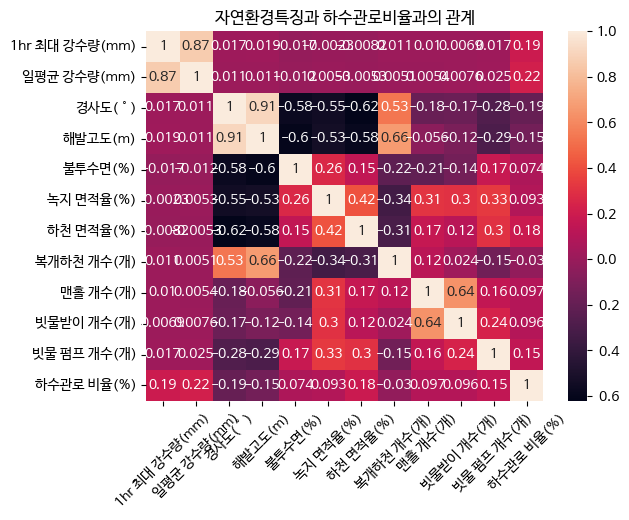

In [39]:
sns.heatmap(cd3.corr(), annot=True)
plt.title('자연환경특징과 하수관로비율과의 관계')
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, '1hr 최대 강수량(mm)'),
  Text(1.5, 0, '일평균 강수량(mm)'),
  Text(2.5, 0, '경사도(˚)'),
  Text(3.5, 0, '해발고도(m)'),
  Text(4.5, 0, '불투수면(%)'),
  Text(5.5, 0, '녹지 면적율(%)'),
  Text(6.5, 0, '하천 면적율(%)'),
  Text(7.5, 0, '복개하천 개수(개)'),
  Text(8.5, 0, '맨홀 개수(개)'),
  Text(9.5, 0, '빗물받이 개수(개)'),
  Text(10.5, 0, '빗물 펌프 개수(개)'),
  Text(11.5, 0, '하수관로 비율(%)')])

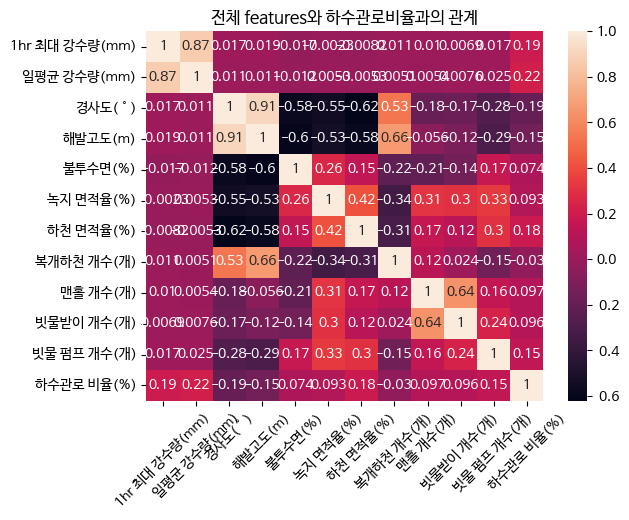

In [41]:
sns.heatmap(cd4.corr(),annot=True)
plt.title('전체 features와 하수관로비율과의 관계')
plt.xticks(rotation=45)